In [1]:
import pandas as pd
import math
import matplotlib.pyplot as plt
import numpy as np

In [16]:
df = pd.read_csv("data_with_zipcode.csv")
df.columns

Index(['CRASH_DATE', 'POSTED_SPEED_LIMIT', 'TRAFFIC_CONTROL_DEVICE',
       'NUM_UNITS', 'ROADWAY_SURFACE_COND', 'ALIGNMENT', 'DEVICE_CONDITION',
       'DAMAGE', 'WEATHER_CONDITION', 'LIGHTING_CONDITION',
       'PRIM_CONTRIBUTORY_CAUSE', 'INTERSECTION_RELATED_I', 'STREET_NO',
       'STREET_NAME', 'STREET_DIRECTION', 'DOORING_I', 'TRAFFICWAY_TYPE',
       'INJURIES_TOTAL', 'LATITUDE', 'LONGITUDE', 'LOCATION', 'YEAR', 'MONTH',
       'DAY', 'HOUR', 'MINUTE', 'SECOND', 'AM_PM', 'cluster', 'zipcode'],
      dtype='object')

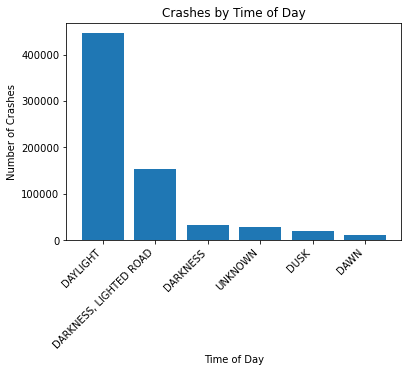

In [3]:
crashes_by_time_of_day = df['LIGHTING_CONDITION'].value_counts().to_dict()

# Filter out any key-value pairs with None values from the dictionary
crashes_by_time_of_day = {k: v for k, v in crashes_by_time_of_day.items() if k is not None and v is not None}

# Plot the data as a bar plot
plt.bar(crashes_by_time_of_day.keys(), crashes_by_time_of_day.values())
plt.xlabel('Time of Day')
plt.ylabel('Number of Crashes')
plt.title('Crashes by Time of Day')

ticks = crashes_by_time_of_day.keys()
plt.xticks(range(len(ticks)), ticks, rotation=45, ha='right')

plt.show()


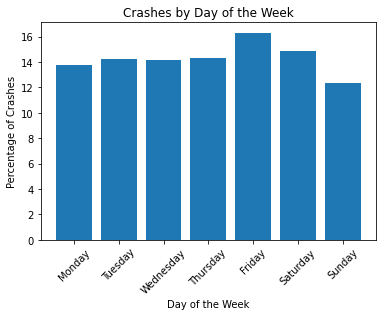

{'Monday': 13.761494327399939,
 'Tuesday': 14.244609084805154,
 'Wednesday': 14.162192848230212,
 'Thursday': 14.347773464853509,
 'Friday': 16.308328938761278,
 'Saturday': 14.830311884940016,
 'Sunday': 12.345289451009887}

In [4]:
# Convert the date column to a datetime data type
df['date'] = pd.to_datetime(df['CRASH_DATE'])

# Create a dictionary where the keys are the day of the week and the values are the number of crashes
crashes_by_day = df['date'].dt.day_name().value_counts()

# Re-index the resulting series in the desired order (Monday to Friday)
crashes_by_day = crashes_by_day.reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])

# Convert the resulting series to a dictionary
crashes_by_day_dict = crashes_by_day.to_dict()

# Get the total number of crashes
total_crashes = sum(crashes_by_day_dict.values())

# Divide each value in the dictionary by the total number of crashes and multiply by 100 to get a percentage
crashes_by_day_dict = {key: (value/total_crashes)*100 for key, value in crashes_by_day_dict.items()}

# Plot the data as a bar plot
plt.bar(crashes_by_day_dict.keys(), crashes_by_day_dict.values())
plt.xlabel('Day of the Week')
plt.ylabel('Percentage of Crashes')
plt.title('Crashes by Day of the Week')

plt.xticks(rotation=45)

plt.show()

crashes_by_day_dict


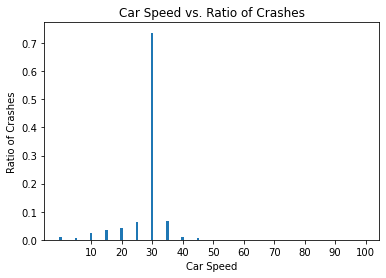

In [5]:
# Count number of crashes for each car speed
crashes_by_speed = df['POSTED_SPEED_LIMIT'].value_counts()

# Get the total number of crashes
total_crashes = sum(crashes_by_speed.values)

# Divide each value in the dictionary by the total number of crashes to get a ratio
crashes_by_speed_dict = {key: value/total_crashes for key, value in crashes_by_speed.items()}

# Plot car speed vs. ratio of crashes
plt.bar(crashes_by_speed_dict.keys(), crashes_by_speed_dict.values())
plt.xlabel('Car Speed')
plt.ylabel('Ratio of Crashes')
plt.title('Car Speed vs. Ratio of Crashes')
plt.xticks(range(10, max(crashes_by_speed_dict.keys()) + 10, 10))

# Display the plot
plt.show()



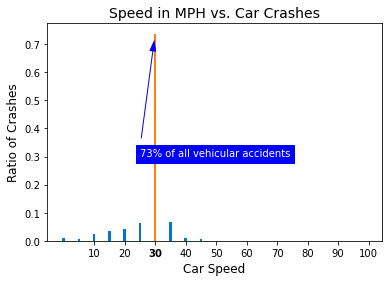

In [6]:
# Define color palette
colors = ['#0077C8' if x != 30 else '#FF7F0E' for x in crashes_by_speed_dict.keys()]

# Plot car speed vs. ratio of crashes with modified aesthetics
plt.bar(crashes_by_speed_dict.keys(), crashes_by_speed_dict.values(), color=colors, linewidth=0)
plt.xlabel('Car Speed', fontsize=12)
plt.ylabel('Ratio of Crashes', fontsize=12)
plt.title('Speed in MPH vs. Car Crashes', fontsize=14)
plt.xticks(range(10, max(crashes_by_speed_dict.keys()) + 10, 10), fontsize=10)
plt.yticks(fontsize=10)
# Remove the grey horizontal lines behind the bar graph
plt.grid(axis='y', alpha=0.5, which='major', color='white', linewidth=0)


# Emphasize the importance of the variable 30
plt.annotate('73% of all vehicular accidents', xy=(30, crashes_by_speed_dict[30]), xytext=(25, 0.3), 
             fontsize=10, color='white', backgroundcolor='blue',
             arrowprops=dict(facecolor='blue', edgecolor='none', shrink=0.05, width=1.0, headwidth=7))

# Bold the tick label for 30 on the x-axis
plt.gca().get_xticklabels()[2].set_weight("bold")
 
# Display the plot
plt.savefig("mph_plot.png")
plt.show()

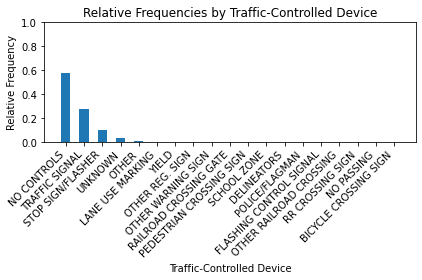

In [7]:
# Count the number of instances of each unique value in the 'TRAFFIC-CONTROLLED-DEVICE' column
counts_by_device = df['TRAFFIC_CONTROL_DEVICE'].value_counts()

# Divide the counts by the total number of observations in the dataset
counts_normalized = counts_by_device / counts_by_device.sum()

# Convert the pandas series to a dictionary
counts_dict = counts_normalized.to_dict()

# Plot the data as a bar plot
plt.bar(counts_dict.keys(), counts_dict.values(), width=0.5)
plt.xlabel('Traffic-Controlled Device')
plt.ylabel('Relative Frequency')
plt.title('Relative Frequencies by Traffic-Controlled Device')

plt.xticks(rotation=45, ha='right')

plt.ylim(0, 1) # Set y-axis limits to 0 and 1

plt.tight_layout()

plt.show()


In [8]:
counts_dict

{'NO CONTROLS': 0.5728648863606892,
 'TRAFFIC SIGNAL': 0.2772441854768759,
 'STOP SIGN/FLASHER': 0.09968762517326141,
 'UNKNOWN': 0.035797751708119725,
 'OTHER': 0.0063584414686227555,
 'LANE USE MARKING': 0.001690109187105029,
 'YIELD': 0.0013976179978617885,
 'OTHER REG. SIGN': 0.0010229987407029586,
 'OTHER WARNING SIGN': 0.0008198398358591316,
 'RAILROAD CROSSING GATE': 0.0006527020134344229,
 'PEDESTRIAN CROSSING SIGN': 0.0005619288857382449,
 'SCHOOL ZONE': 0.00038038263034588884,
 'DELINEATORS': 0.0003789417870491241,
 'POLICE/FLAGMAN': 0.0003458023912235353,
 'FLASHING CONTROL SIGNAL': 0.0003414798613332411,
 'OTHER RAILROAD CROSSING': 0.00023197577077912161,
 'RR CROSSING SIGN': 0.0001383209564894141,
 'NO PASSING': 5.763373187058922e-05,
 'BICYCLE CROSSING SIGN': 2.737602263852988e-05}

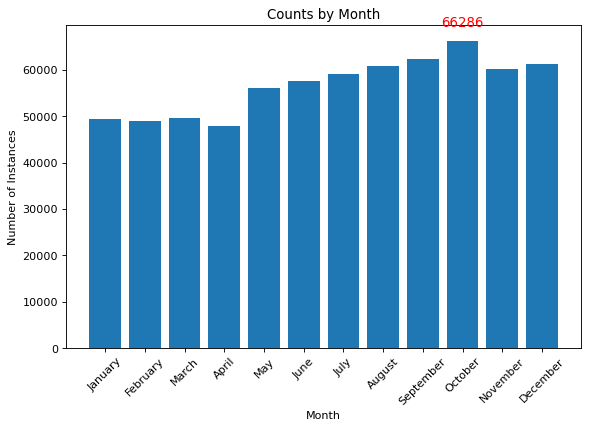

In [30]:
# Count the number of times each unique value appears in the 'month' column
counts_by_month = df['MONTH'].value_counts()

# Convert the pandas Series to a dictionary
counts_dict = counts_by_month.to_dict()

# Define the month names
month_names = ['January', 'February', 'March', 'April', 'May', 'June', 
               'July', 'August', 'September', 'October', 'November', 'December']

# Create a figure with a larger size and padding
fig = plt.figure(figsize=(8, 6), dpi=80, tight_layout={'pad': 3})

# Create a bar plot of the dictionary
plt.bar(counts_dict.keys(), counts_dict.values())

# Add a label to the highest bar
highest_count = max(counts_dict.values())
plt.annotate(str(highest_count), xy=(list(counts_dict.keys())[list(counts_dict.values()).index(highest_count)], highest_count), 
             xytext=(0, 10), textcoords='offset points', ha='center', va='bottom', fontsize=12, color='r')

# Set x-tick locations and labels
plt.xticks(range(1, 13), month_names, rotation=45)  # set tick locations to integers from 1 to 12
plt.xlabel('Month')
plt.ylabel('Number of Instances')
plt.title('Counts by Month')

# Show the plot
plt.savefig('correct.png')
plt.show()


In [24]:
counts_dict

{10: 66286,
 9: 62374,
 12: 61288,
 8: 60755,
 11: 60082,
 7: 59032,
 6: 57574,
 5: 56088,
 3: 49678,
 1: 49396,
 2: 49042,
 4: 47872}

In [11]:
# select only the rows with years outside the range 2012-2014
mask = df['YEAR'].isin([2012, 2013, 2014, 2015])

# select only the rows with years not in the list [2012, 2013, 2014]
df = df[~mask]

print(df)

                 CRASH_DATE  POSTED_SPEED_LIMIT TRAFFIC_CONTROL_DEVICE  \
0       2019-03-25 14:43:00                  30         TRAFFIC SIGNAL   
1       2018-09-05 08:40:00                  30            NO CONTROLS   
2       2022-07-15 00:45:00                  30                UNKNOWN   
3       2022-08-29 11:30:00                  30         TRAFFIC SIGNAL   
4       2022-07-15 18:50:00                  30         TRAFFIC SIGNAL   
...                     ...                 ...                    ...   
694033  2022-11-24 00:01:00                  30      STOP SIGN/FLASHER   
694034  2022-11-24 15:50:00                  30            NO CONTROLS   
694035  2022-11-24 13:00:00                  30         TRAFFIC SIGNAL   
694036  2022-11-24 06:47:00                  10            NO CONTROLS   
694037  2022-11-24 16:40:00                  30            NO CONTROLS   

        NUM_UNITS ROADWAY_SURFACE_COND           ALIGNMENT  \
0               2                  DRY  STRAIGHT 

In [12]:
# Create a DataFrame of ZIP Codes and their counts
zipcode_counts_df = pd.DataFrame(df['zipcode'].value_counts()).reset_index()

# Rename columns
zipcode_counts_df.columns = ['ZIP Code', 'Count']

zipcode_counts_df.to_csv('zipcode_counts.csv', index=True)
zipcode_counts_df

,ZIP Code,Count
0,60628,29975
1,60644,28512
2,60632,27163
3,60652,26509
4,60629,25485
5,60620,25251
6,60651,24336
7,60649,23322
8,60612,21709
9,60645,21620


In [13]:
crashes_by_speed_dict

{30: 0.7369754970188952,
 35: 0.06735221990726732,
 25: 0.06260175955783401,
 20: 0.04091850878482158,
 15: 0.03502401885775707,
 10: 0.02271057204360568,
 0: 0.010400006916047824,
 40: 0.009630596595575459,
 45: 0.00622876557191393,
 5: 0.006188421959604518,
 55: 0.0008011088730011901,
 50: 0.0002362983006694158,
 3: 0.00023197577077912161,
 9: 0.0001368801131926494,
 39: 0.00010229987407029587,
 99: 9.509565758647221e-05,
 1: 5.6192888573824485e-05,
 60: 5.1870358683530295e-05,
 24: 5.042951538676557e-05,
 2: 3.602108241911826e-05,
 32: 2.4494336045000416e-05,
 34: 2.0171806154706226e-05,
 33: 1.8730962857941495e-05,
 65: 1.8730962857941495e-05,
 11: 1.5849276264412036e-05,
 6: 1.0085903077353113e-05,
 36: 7.2042164838236525e-06,
 7: 7.2042164838236525e-06,
 70: 5.763373187058922e-06,
 14: 4.322529890294191e-06,
 12: 4.322529890294191e-06,
 29: 4.322529890294191e-06,
 26: 2.881686593529461e-06,
 18: 2.881686593529461e-06,
 38: 2.881686593529461e-06,
 31: 2.881686593529461e-06,
 8: 2.

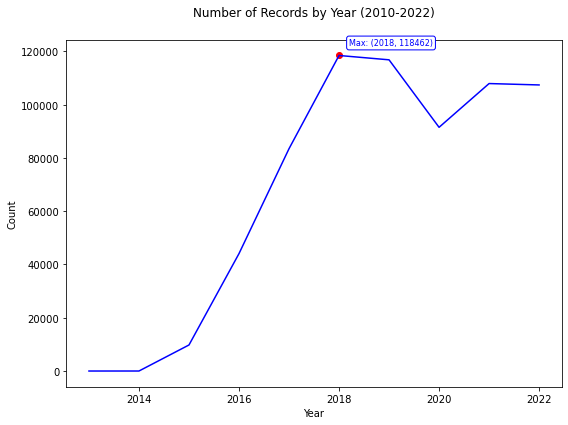

In [22]:
# Filter out the 2023 year
df = df[df['YEAR'] != 2023]

# Create a dictionary of year counts
year_counts = df['YEAR'].value_counts().to_dict()

# Sort the dictionary by year
sorted_year_counts = sorted(year_counts.items())

# Extract the x and y values from the sorted dictionary
x_values = [x[0] for x in sorted_year_counts]
y_values = [x[1] for x in sorted_year_counts]

# Create a figure and axis object
fig, ax = plt.subplots()

# Plot the line with a blue color and solid line style
ax.plot(x_values, y_values, color='blue', linestyle='-')

# Find the index of the maximum value in y_values
max_index = y_values.index(max(y_values))

# Add a red dot at the maximum value
ax.scatter(x_values[max_index], y_values[max_index], color='red')

# Add a label to the maximum point
ax.annotate(f"Max: ({x_values[max_index]}, {y_values[max_index]})", 
            xy=(x_values[max_index], y_values[max_index]), 
            xytext=(10, 10), textcoords='offset points', 
            color='blue', fontsize=8,
            bbox=dict(facecolor='white', edgecolor='blue', boxstyle='round,pad=0.3'))

# Set the x and y axis labels
ax.set_xlabel('Year')
ax.set_ylabel('Count')

# Set the plot title with a higher y position
ax.set_title('Number of Records by Year (2010-2022)', y=1.05)

# Make the tick label for year 2019 bold
ax.get_xticklabels()[x_values.index(2019)].set_weight('bold')
# Set the figure size to 8 inches by 6 inches
fig.set_size_inches(8, 6)

# Adjust the layout to fit the x and y axis labels
fig.tight_layout()

# Save the plot to a file
# Save the plot to a file
plt.savefig("new_plot1.png")

# Show the plot
plt.show()
